In [484]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [486]:
data=pd.read_csv("C:\\Users\\Lenovo\\Documents\\Ict\\data_sets\\force2020_data.csv")
data.head()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
0,1.884186,80.200851,494.528,NaN,20.915468,161.131180
1,1.889794,79.262886,494.680,NaN,19.383013,160.603470
2,1.896523,74.821999,494.832,NaN,22.591518,160.173615
3,1.891913,72.878922,494.984,NaN,32.191910,160.149429
4,1.880034,71.729141,495.136,NaN,38.495632,160.128342


In [488]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18270 entries, 0 to 18269
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RHOB      18270 non-null  float64
 1   GR        18270 non-null  float64
 2   DEPTH_MD  18270 non-null  float64
 3   NPHI      14032 non-null  float64
 4   PEF       16440 non-null  float64
 5   DTC       18189 non-null  float64
dtypes: float64(6)
memory usage: 856.5 KB


In [490]:
data.describe()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
count,18270.000000,18270.000000,18270.000000,14032.000000,16440.000000,18189.000000
mean,2.110451,63.847477,1883.228478,0.404547,3.463851,125.106178
std,0.297725,28.636331,801.941195,0.133532,2.561239,30.618337
min,1.404576,6.191506,494.528000,0.024330,1.010027,55.726753
25%,1.963399,43.866690,1188.750000,0.315346,2.320836,90.883087
50%,2.055079,66.777851,1882.972000,0.448527,2.790249,141.300461
75%,2.381963,81.542681,2577.802000,0.506343,4.267342,148.048355
max,2.927888,499.022583,3272.024000,0.800262,66.030319,175.953140


In [492]:
data.isna().sum()

RHOB           0
GR             0
DEPTH_MD       0
NPHI        4238
PEF         1830
DTC           81
dtype: int64

In [494]:
data.shape

(18270, 6)

In [496]:
data.duplicated().sum()

0

In [498]:
data.columns.duplicated().sum()

0

## Handling Missing Values

In [501]:
data_col

Index(['RHOB', 'GR', 'DEPTH_MD', 'NPHI', 'PEF', 'DTC'], dtype='object')

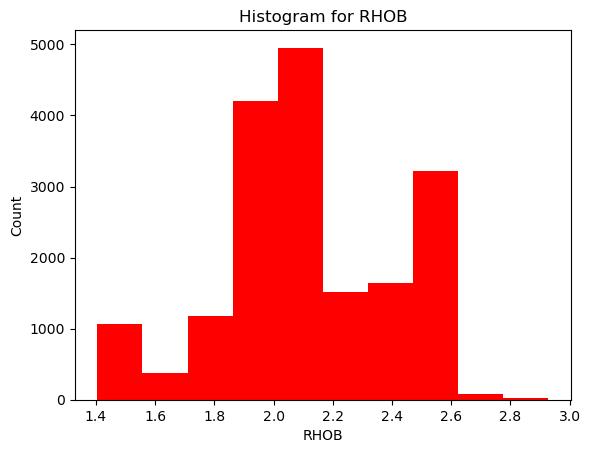

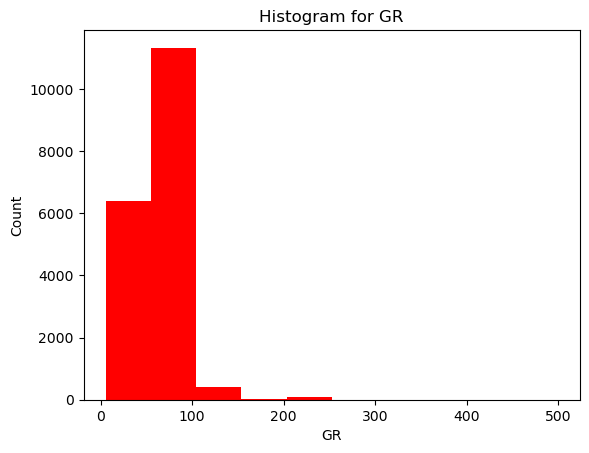

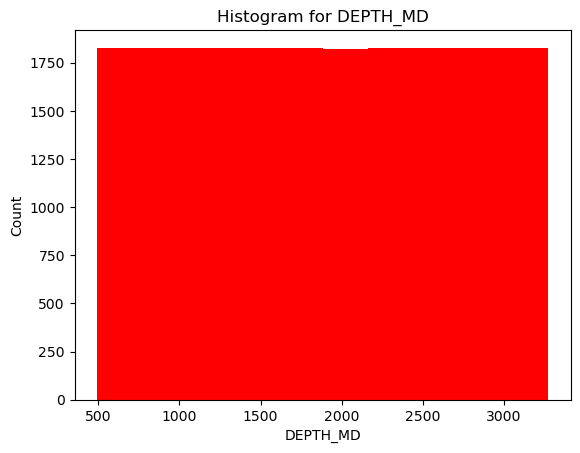

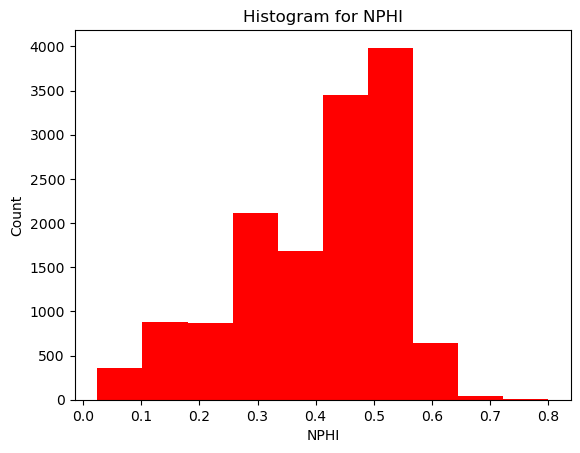

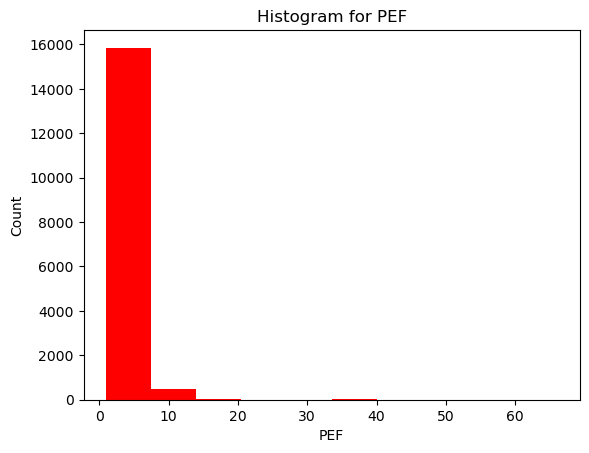

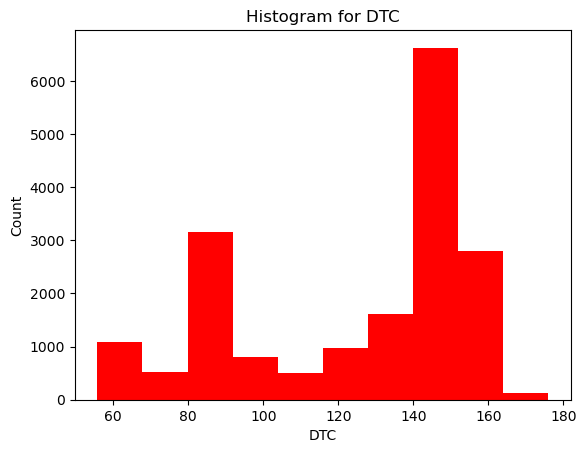

In [503]:
for col in data_col:
    plt.hist(data[col],color='r')
    plt.title(f'Histogram for {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

In [504]:
for col in data_col:
    data[col]=data[col].fillna(data[col].median())

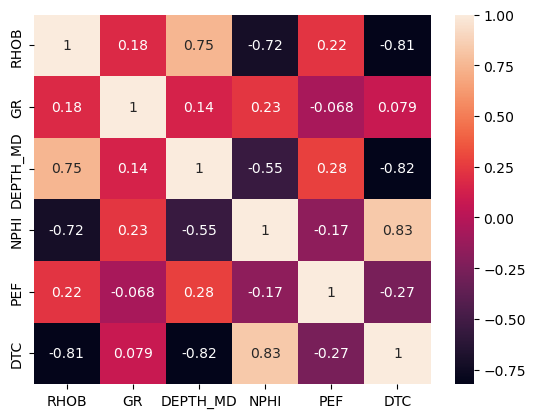

In [507]:
sns.heatmap(data.corr(),annot=True)
plt.show()

In [509]:
data_col=data.columns

In [511]:
data.isna().sum()

RHOB        0
GR          0
DEPTH_MD    0
NPHI        0
PEF         0
DTC         0
dtype: int64

## Outlier Handling

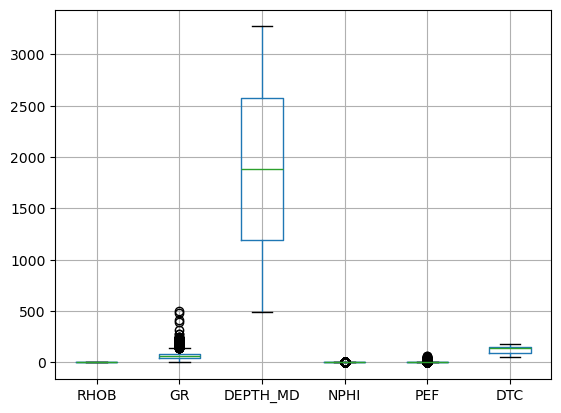

In [514]:
data.boxplot()
plt.show()

In [516]:
def remove_outlier(df,col):
    q1=data[col].quantile(0.25)
    q3=data[col].quantile(0.75)
    iqr=q3-q1
    lower_bound=q1-1.5*iqr
    upper_bound=q3+1.5*iqr
    data[col]=data[col].clip(upper=upper_bound)
    data[col]=data[col].clip(lower=lower_bound)
    return data[col]

In [518]:
for col in data_col:
    data[col]=remove_outlier(data,col)

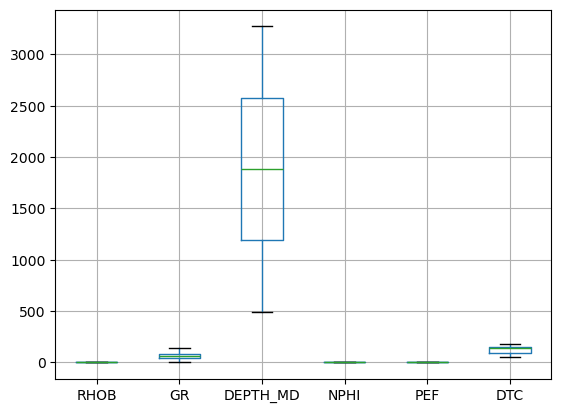

In [520]:
data.boxplot()
plt.show()

## K Means Clustering

In [523]:
X=data[['RHOB', 'GR']]

In [525]:
X.head(3)

,RHOB,GR
0,1.884186,80.200851
1,1.889794,79.262886
2,1.896523,74.821999


In [527]:
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

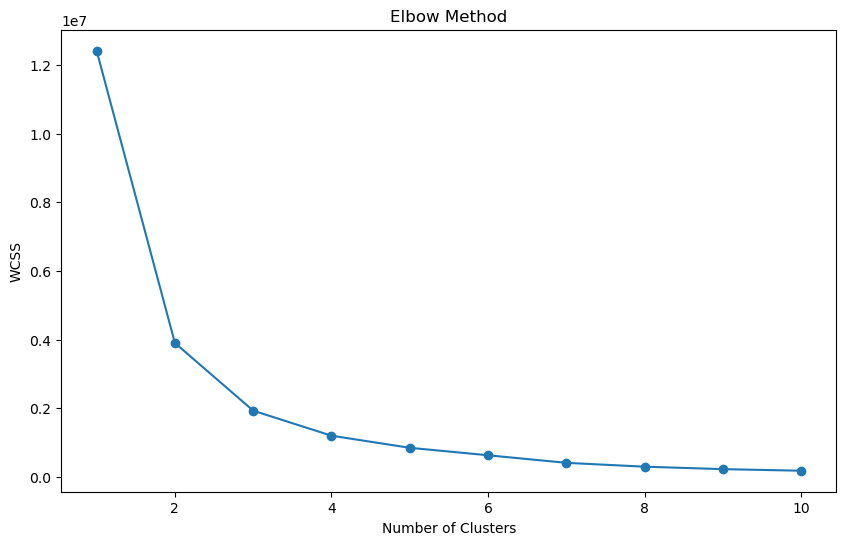

In [528]:
# plotting the elbow method
plt.figure(figsize = (10,6))
plt.plot(range(1,11), wcss,marker = 'o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [529]:
from sklearn.metrics import silhouette_score
  #Silhouette score of kmeans clustering
silhouette_avg1 = silhouette_score(X, y_kmeans)
print(silhouette_avg1)

0.6040380894294045


## K=4

In [532]:
# applying k means clustering with optimal number of clusters
kmeans = KMeans(n_clusters = 4, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)

y_kmeans = kmeans.fit_predict(X)

In [534]:
# Adding cluster labels to the dataset
data['Cluster'] = y_kmeans
data.head()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC,Cluster
0,1.884186,80.200851,494.528,0.448527,6.583927,161.131180,2
1,1.889794,79.262886,494.680,0.448527,6.583927,160.603470,2
2,1.896523,74.821999,494.832,0.448527,6.583927,160.173615,2
3,1.891913,72.878922,494.984,0.448527,6.583927,160.149429,2
4,1.880034,71.729141,495.136,0.448527,6.583927,160.128342,2


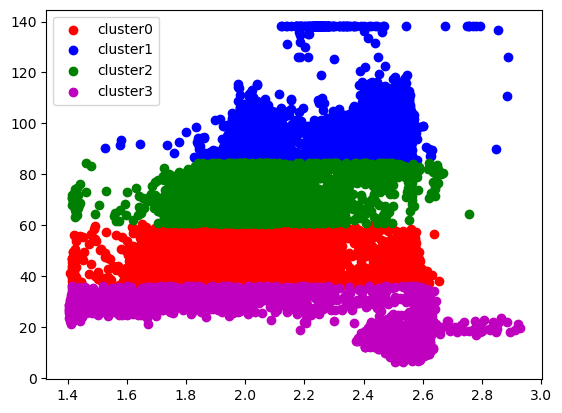

In [535]:
colors=['r','b','g','m'] 
for i in range (4):
    cluster_df=X[y_kmeans==i] 
    plt.scatter(cluster_df['RHOB'],
                cluster_df['GR'],
                c=colors[i],
                label=f'cluster{i}') 
    plt.legend()

In [536]:
from sklearn.metrics import silhouette_score
  #Silhouette score of kmeans clustering
silhouette_avg1 = silhouette_score(X, y_kmeans)
print(silhouette_avg1)

0.5487064795507897


## K=2

In [538]:
# applying k means clustering with optimal number of clusters
kmeans = KMeans(n_clusters = 2, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)

y_kmeans = kmeans.fit_predict(X)

In [539]:
data['Cluster'] = y_kmeans
data.head()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC,Cluster
0,1.884186,80.200851,494.528,0.448527,6.583927,161.131180,0
1,1.889794,79.262886,494.680,0.448527,6.583927,160.603470,0
2,1.896523,74.821999,494.832,0.448527,6.583927,160.173615,0
3,1.891913,72.878922,494.984,0.448527,6.583927,160.149429,0
4,1.880034,71.729141,495.136,0.448527,6.583927,160.128342,0


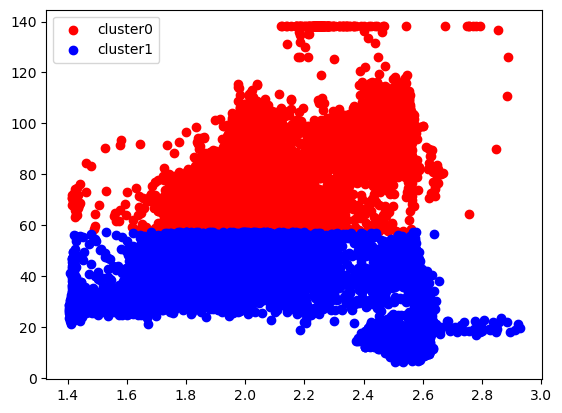

In [540]:
colors=['r','b','g','y'] 
for i in range (2):
    cluster_df=X[y_kmeans==i] 
    plt.scatter(cluster_df['RHOB'],
                cluster_df['GR'],
                c=colors[i],
                label=f'cluster{i}') 
    plt.legend()

In [541]:
from sklearn.metrics import silhouette_score
  #Silhouette score of kmeans clustering
silhouette_avg1 = silhouette_score(X, y_kmeans)
print(silhouette_avg1)

0.6040380894294045


## With Scaling

In [543]:
data.drop('Cluster',axis=1,inplace=True)

In [548]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
data_scaled = scale.fit_transform(data)

In [549]:
data1=pd.DataFrame(data_scaled,columns=[data.columns])

In [550]:
data1

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
0,-0.759999,0.648114,-1.731721,0.283346,2.395861,1.176153
1,-0.741163,0.612133,-1.731532,0.283346,2.395861,1.158889
2,-0.718560,0.441774,-1.731342,0.283346,2.395861,1.144827
3,-0.734045,0.367235,-1.731152,0.283346,2.395861,1.144036
4,-0.773944,0.323128,-1.730963,0.283346,2.395861,1.143346
...,...,...,...,...,...,...
18265,1.745819,-1.683564,1.731081,-1.966486,-0.307889,0.527422
18266,1.789158,-1.605864,1.731271,-1.985785,-0.307889,0.527422
18267,1.917421,-1.559734,1.731461,-2.067770,-0.307889,0.527422
18268,2.109002,-1.574822,1.731650,-2.080339,-0.307889,0.527422


In [551]:
X=data[['RHOB', 'GR']]

In [552]:
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

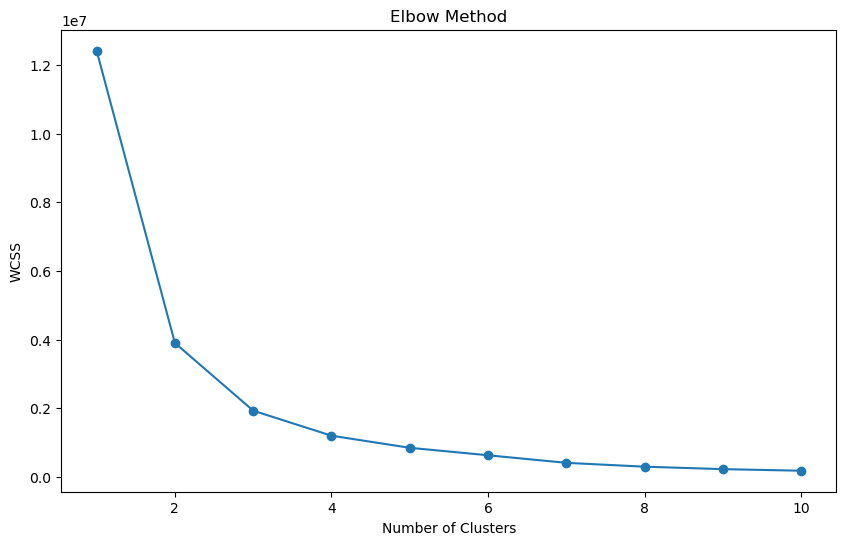

In [553]:
plt.figure(figsize = (10,6))
plt.plot(range(1,11), wcss,marker = 'o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [554]:
from sklearn.metrics import silhouette_score
  #Silhouette score of kmeans clustering
silhouette_avg1 = silhouette_score(X, y_kmeans)
print(silhouette_avg1)

0.6040380894294045


## K=2

In [556]:
# applying k means clustering with optimal number of clusters
kmeans = KMeans(n_clusters = 2, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)

y_kmeans = kmeans.fit_predict(X)

In [557]:
data['Cluster'] = y_kmeans
data.head()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC,Cluster
0,1.884186,80.200851,494.528,0.448527,6.583927,161.131180,0
1,1.889794,79.262886,494.680,0.448527,6.583927,160.603470,0
2,1.896523,74.821999,494.832,0.448527,6.583927,160.173615,0
3,1.891913,72.878922,494.984,0.448527,6.583927,160.149429,0
4,1.880034,71.729141,495.136,0.448527,6.583927,160.128342,0


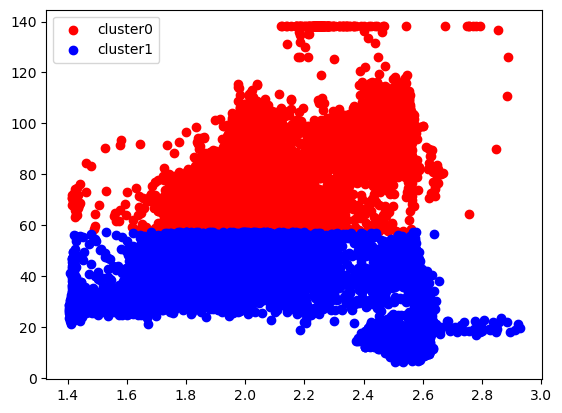

In [558]:
colors=['r','b','g','y'] 
for i in range (2):
    cluster_df=X[y_kmeans==i] 
    plt.scatter(cluster_df['RHOB'],
                cluster_df['GR'],
                c=colors[i],
                label=f'cluster{i}') 
    plt.legend()

In [562]:
from sklearn.metrics import silhouette_score
  #Silhouette score of kmeans clustering
silhouette_avg1 = silhouette_score(X, y_kmeans)
print(silhouette_avg1)

0.6040380894294045
